In [142]:
using Plots
using LaTeXStrings
#using PyPlot

# Examen 3
## Física Computacional
### Aquino Chapa Martha Abril
Hecho en Julia 🔴🟢🟣

####  Encuentra la solución numérica para la ecuación diferencial $∇^{2}φ=0$ en dos dimensiones con condiciones
a la frontera φ(0, y) = φ(x, 0) = φ(1, y) = φ(x, 1) = 0 y φ = 1 para todos los puntos x, y en dos círculos
de radio 1/4 con centros en (0.4, 0.5) y (0.6, 0.5).

In [3]:
function Malla_circ2(x,y,r,V_0=1.0)
    Mat=zeros(length(x),length(y))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            if sqrt((x[j]-0.4)^2+(y[i]-0.5)^2 )<=r || sqrt((x[j]-0.6)^2+(y[i]-0.5)^2 )<=r
                Mat[i,j]=V_0
            else
                Mat[i,j] = rand()
            end
        end
    end
    return Mat
end 

Malla_circ2 (generic function with 2 methods)

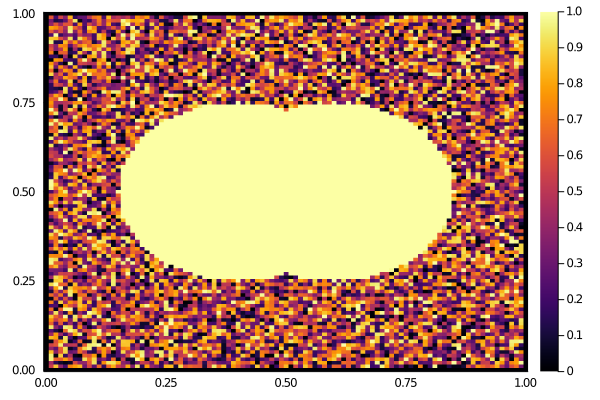

In [3]:
x=collect(0:0.01:1)
y=collect(0:0.01:1)
mi_malla=Malla_circ2(x,y,0.25)
heatmap(x,y,mi_malla)

In [4]:
function relax(Mat,V_0=1.0)
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            if Mat[i,j] !=V_0
                Mat[i,j]=0.25(Mat[i+1,j]+Mat[i-1,j]+Mat[i,j+1]+Mat[i,j-1])
            end
        end
    end
    return Mat
end

relax (generic function with 2 methods)

In [5]:
function met_jacobi(Mat,error=1e-5)
    testigo,cuenta=true,0
    while testigo==true
        Mat_old=copy(Mat)
        Mat=relax(Mat)
        cuenta+= 1
        if maximum(abs.(Mat .- Mat_old))<=error
            testigo=false
        end
    end
    return Mat,cuenta
end

met_jacobi (generic function with 2 methods)

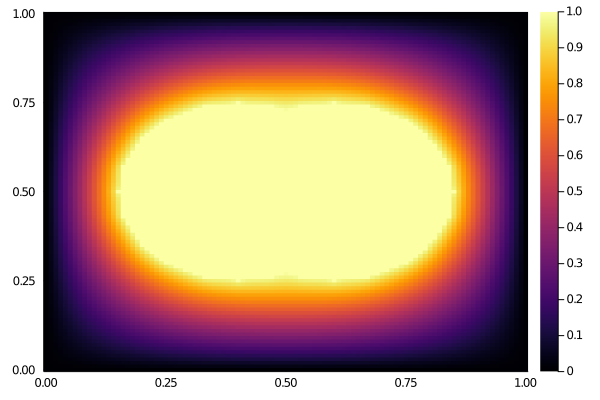

In [6]:
x1=collect(0:0.01:1)
y1=collect(0:0.01:1)
ϕ=Malla_circ2(x1,y1,0.25)
ϕ,num=met_jacobi(ϕ)
heatmap(x1,y1,ϕ)

Obteniendo las equipotenciales:

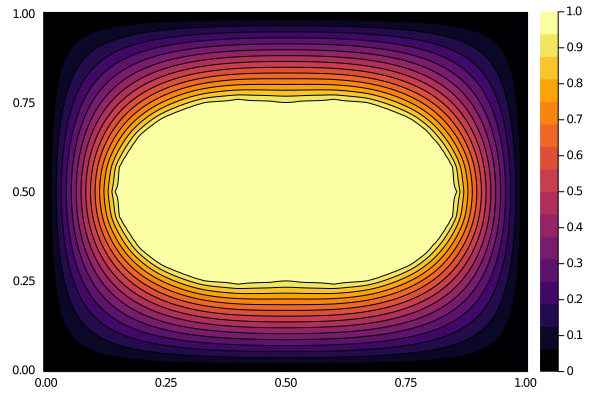

In [7]:
contourf!(x1,y1,ϕ)

Para obtener el campo eléctrico es necesario definir una función que nos regrese el gradiente, debido a que estamos haciendo uso de coordenadas cartesianas y de dos variables restrigiré a esas variables la función.

In [14]:
function gradiente_x(x,y,ϕ,h)
    grad=zeros(length(x),length(y))
    for i in 2:length(y)-1
        for j in 2:length(x)1
            grad[i,j]=(ϕ[i,j+1]-ϕ[i,j-1])/h
        end
    end
    return grad
end
function gradiente_y(x,y,ϕ,h)
    grad=zeros(length(x),length(x))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            grad[i,j]=(ϕ[i+1,j]-ϕ[i-1,j])/h
        end
    end
    return grad
end

gradiente_y (generic function with 2 methods)

In [15]:
x1=collect(0:0.01:1)
h1=x1[2]-x1[1]
y1=collect(0:0.01:1)
h2=y[2]-y[1]
ϕ=Malla_circ2(x1,y1,0.25)
ϕ,num=met_jacobi(ϕ)
E_x=-gradiente_x(x1,y1,ϕ,h1)
E_y=-gradiente_y(x1,y1,ϕ,h2)
streamplot(x1,y1,E_x,E_y)

LoadError: BoundsError: attempt to access 101×101 Array{Float64,2} at index [2, 102]

$$\mathbb{A}=\Psi^{n+1}_{ij}=\mathbb{B}\psi{n}_{ij}$$

$\mathbb{A}=\Psi^{n+1}_{ij}=\mathbb{A}^{-1}\Psi{n}_{ij}$

In [99]:
function Psi_ini(x,y)
    Nx,Ny = length(x),length(y)
    phi=zeros(Ny,Nx)
    #cordenada y
    for i in 2:Nx-1
       for j in 2:Ny-1
            phi[j,i]=x[i]*y[j]*(1-x[i])*(1-y[j])
        end
    end
    return phi/0.0625
end

Psi_ini (generic function with 1 method)

In [51]:
function Mat_evol_CN_2D(x,y,t,D=1.0)
    Nx,Ny=length(x),length(y)
    Δx,Δy,Δt=x[2]-x[1],y[2]-y[1],t[2]-t[1]
    r = (D*Δt)/(2*Δx*Δy)
    println("r = ",r)
    A=zeros( (Nx-2)*(Ny-2) ,(Nx-2)*(Ny-2) )
    B=zeros( (Nx-2)*(Ny-2) ,(Nx-2)*(Ny-2) )
    #Para la diagonal
    for i in 1:Nx-2
       for j in 1:Ny-2
            A[ (Ny-2)*(i-1)+j , (Ny-2)*(i-1)+j ]=1+4*r
            
            B[ (Ny-2)*(i-1)+j , (Ny-2)*(i-1)+j ]=1-4*r
        end
    end
    #Para las diagonales inferior y superior
    for i in 1:Nx-2
       for j in 1:Ny-3
            A[ (Ny-2)*(i-1)+j , (Ny-2)*(i-1)+j+1 ]=-r
            A[ (Ny-2)*(i-1)+j+1 , (Ny-2)*(i-1)+j ]=-r
            
            B[ (Ny-2)*(i-1)+j , (Ny-2)*(i-1)+j+1 ]=r
            B[ (Ny-2)*(i-1)+j+1 , (Ny-2)*(i-1)+j ]=r
        end
    end
    
    for i in 1:Nx-3
       for j in 1:Ny-2
            A[ (Ny-2)*(i-1)+j , (Ny-2)*(i)+j ]=-r
            A[ (Ny-2)*(i)+j , (Ny-2)*(i-1)+j ]=-r
            
            B[ (Ny-2)*(i-1)+j , (Ny-2)*(i)+j ]=r
            B[ (Ny-2)*(i)+j , (Ny-2)*(i-1)+j ]=r
        end
    end
    A_inversa=inv(A)
    Evol = A_inversa*B
    return Evol
end

Mat_evol_CN_2D (generic function with 2 methods)

Programando el método de Crack-Nicholson

In [62]:
function Cranck_Nicholson_2D(Ψ₀,M_evo,t)
   #Vamos a guardar las diagonales
    Nx,Ny,Nt=length(Ψ₀[:,1]),length(Ψ₀[1,:]),length(t)
    Ψ_xy_t=zeros(Nx,Ny,Nt) #Copiando Psi inicial a la solución final
    Ψ_xy_t[:,:,1] = Ψ₀
    Ψ_in_t = reshape( Ψ₀[2:end-1,2:end-1],((Nx-2)*(Ny-2),1))  #Vector
    for i in 2:Nt
       Ψ_in_t = M_evo*Ψ_in_t
        Ψ_xy_t[2:end-1,2:end-1,i]=reshape(Ψ_in_t,(Nx-2,Ny-2))
    end
    return Ψ_xy_t
end

Cranck_Nicholson_2D (generic function with 1 method)

In [59]:
x=collect(0:0.25:1)
y=collect(0:0.25:1)
t=collect(0:0.05:1)
psi_mat=Psi_ini(x,y)

5×5 Array{Float64,2}:
 0.0  0.0      0.0    0.0      0.0
 0.0  0.05625  0.075  0.05625  0.0
 0.0  0.075    0.1    0.075    0.0
 0.0  0.05625  0.075  0.05625  0.0
 0.0  0.0      0.0    0.0      0.0

In [60]:
M_t= Mat_evol_CN_2D(x,y,t)

r = 0.4


9×9 Array{Float64,2}:
 -0.189199     0.135105    0.0224593    0.135105   …   0.0108809   0.00334797
  0.135105    -0.166739    0.135105     0.0449186      0.0258073   0.0108809
  0.0224593    0.135105   -0.189199     0.0108809      0.0108809   0.0224593
  0.135105     0.0449186   0.0108809   -0.166739       0.0449186   0.0108809
  0.0449186    0.145985    0.0449186    0.145985       0.145985    0.0449186
  0.0108809    0.0449186   0.135105     0.0258073  …   0.0449186   0.135105
  0.0224593    0.0108809   0.00334797   0.135105       0.135105    0.0224593
  0.0108809    0.0258073   0.0108809    0.0449186     -0.166739    0.135105
  0.00334797   0.0108809   0.0224593    0.0108809      0.135105   -0.189199

In [66]:
Psi_total=Cranck_Nicholson_2D(psi_mat,M_t,t)

5×5×21 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0      0.0    0.0      0.0
 0.0  0.05625  0.075  0.05625  0.0
 0.0  0.075    0.1    0.075    0.0
 0.0  0.05625  0.075  0.05625  0.0
 0.0  0.0      0.0    0.0      0.0

[:, :, 2] =
 0.0  0.0        0.0        0.0        0.0
 0.0  0.0184622  0.0271898  0.0184622  0.0
 0.0  0.0271898  0.0398091  0.0271898  0.0
 0.0  0.0184622  0.0271898  0.0184622  0.0
 0.0  0.0        0.0        0.0        0.0

[:, :, 3] =
 0.0  0.0         0.0         0.0         0.0
 0.0  0.00712487  0.00981272  0.00712487  0.0
 0.0  0.00981272  0.0135841   0.00981272  0.0
 0.0  0.00712487  0.00981272  0.00712487  0.0
 0.0  0.0         0.0         0.0         0.0

...

[:, :, 19] =
 0.0  0.0          0.0          0.0          0.0
 0.0  6.45057e-10  7.82917e-10  6.45057e-10  0.0
 0.0  7.82917e-10  1.29007e-9   7.82917e-10  0.0
 0.0  6.45057e-10  7.82917e-10  6.45057e-10  0.0
 0.0  0.0          0.0          0.0          0.0

[:, :, 20] =
 0.0  0.0          0.0          0.0    

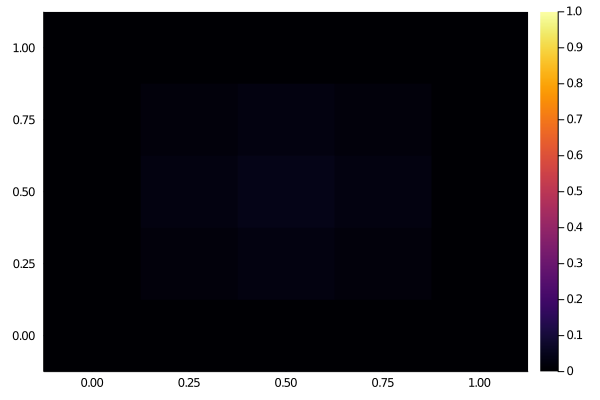

In [76]:
heatmap(x,y,Psi_total[:,:,2],clim=(0,1))

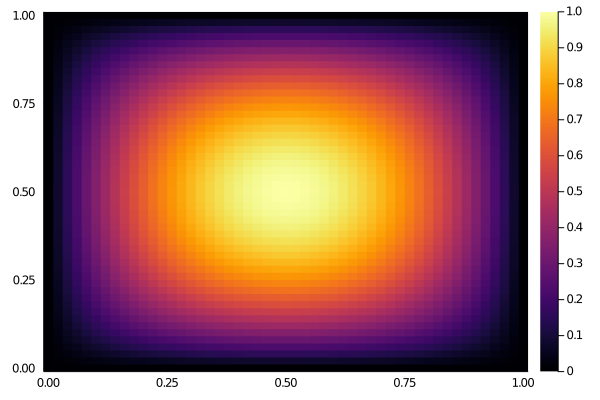

In [100]:
x1=collect(0:0.02:1)
y1=collect(0:0.02:1)
t1=collect(0:0.0001:0.05)
psi_mat1 = Psi_ini(x1,y1)
heatmap(x1,y1,psi_mat1)

In [101]:
M_t1 = Mat_evol_CN_2D(x1,y1,t1);

r = 0.125


In [102]:
Psi_total1 = Cranck_Nicholson_2D(psi_mat1,M_t1,t1);

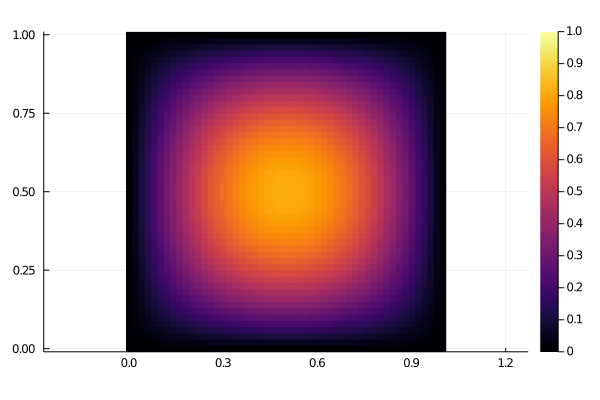

In [109]:
heatmap(x1,y1,Psi_total1[:,:,120],clim=(0,1),aspect_ratio=:equal)

Parte del examen

In [124]:
function Psi_ini_circ(x,y)
    Nx,Ny = length(x),length(y)
    phi=zeros(Ny,Nx)
    #cordenada y
    for i in 2:Nx-1
       for j in 2:Ny-1
            if sqrt(( x[i]-0.5 )^2+(y[j]-0.5)^2)<=(1/4)
                phi[j,i]=1
            end
        end
    end
    return phi
end

Psi_ini_circ (generic function with 1 method)

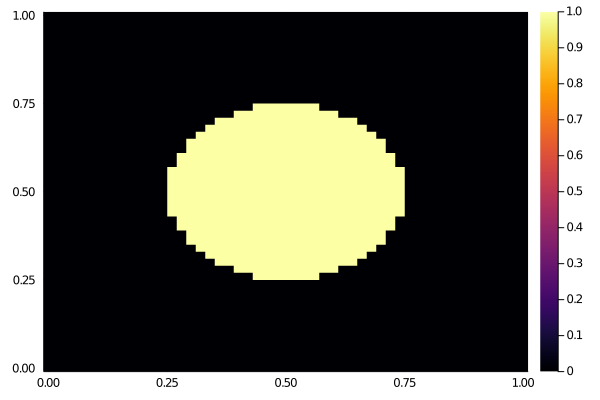

In [125]:
x2=collect(0:0.02:1)
y2=collect(0:0.02:1)
t2=collect(0:0.0001:0.05)
psi_mat2 = Psi_ini_circ(x2,y2)
heatmap(x2,y2,psi_mat2)

In [126]:
M_t2 = Mat_evol_CN_2D(x2,y2,t2);

r = 0.125


In [127]:
Psi_total2 = Cranck_Nicholson_2D(psi_mat2,M_t2,t2);

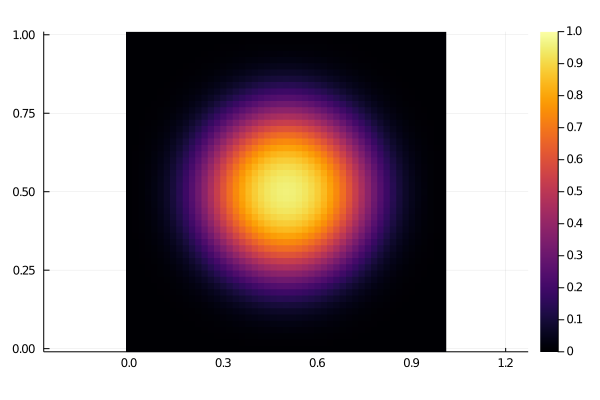

In [130]:
heatmap(x2,y2,Psi_total2[:,:,50],clim=(0,1),aspect_ratio=:equal)

Ahora si con el de la tarea.

In [132]:
function Psi_ini_circ2(x,y)
    Nx,Ny = length(x),length(y)
    phi=zeros(Ny,Nx)
    #cordenada y
    for i in 2:Nx-1
       for j in 2:Ny-1
            if sqrt(( x[i]-0.4 )^2+(y[j]-0.5)^2)<=(1/4) || sqrt(( x[i]-0.6 )^2+(y[j]-0.5)^2)<=(1/4)
                phi[j,i]=1
            end
        end
    end
    return phi
end

Psi_ini_circ2 (generic function with 1 method)

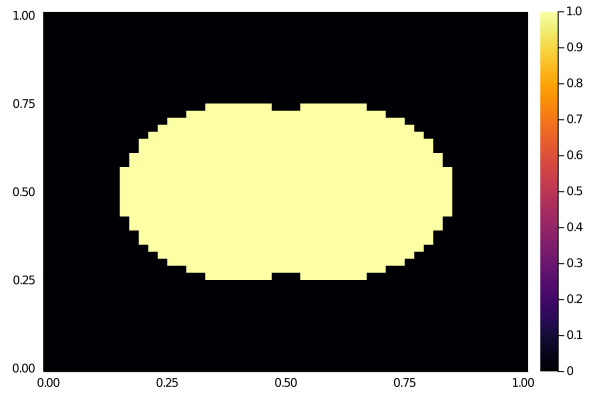

In [133]:
x3=collect(0:0.02:1)
y3=collect(0:0.02:1)
t3=collect(0:0.0001:0.05)
psi_mat3 = Psi_ini_circ2(x3,y3)
heatmap(x3,y3,psi_mat3)

In [134]:
M_t3 = Mat_evol_CN_2D(x3,y3,t3);

r = 0.125


In [135]:
Psi_total3 = Cranck_Nicholson_2D(psi_mat3,M_t3,t3);

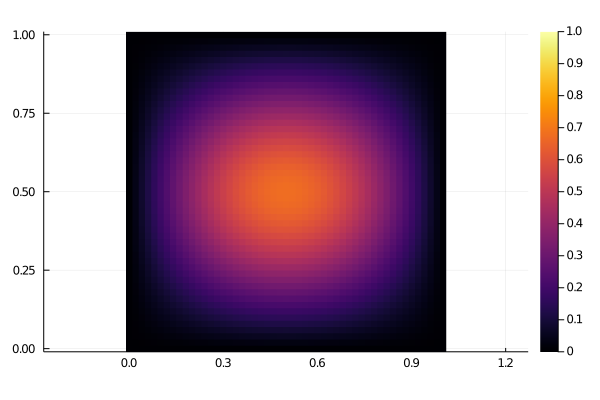

In [151]:
heatmap(x3,y3,Psi_total3[:,:,200],clim=(0,1),aspect_ratio=:equal)

Calculando las isotermas.

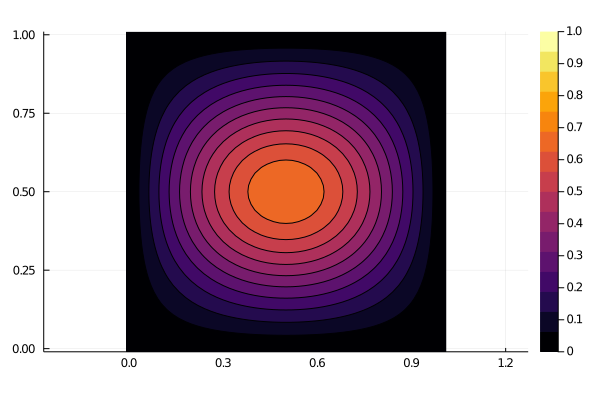

In [153]:
contourf!(x3,y3,Psi_total3[:,:,200],clim=(0,1),aspect_ratio=:equal)

┌ Info: Saved animation to 
│   fn = C:\Users\marth\Fisica computacional\Fisica-computacional\dos_circ_calor.gif
└ @ Plots C:\Users\marth\.julia\packages\Plots\hooUV\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\marth\\Fisica computacional\\Fisica-computacional\\dos_circ_calor.gif")
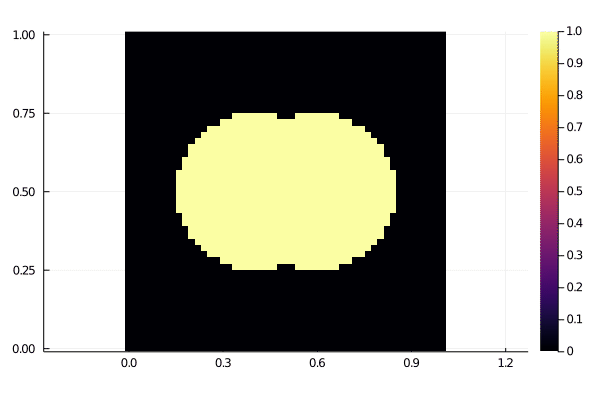

In [158]:
mi_peli=@animate for i =1:length(t3)
    heatmap(x3,y3,Psi_total3[:,:,i],clim=(0,1),aspect_ratio=:equal)
end
gif(mi_peli,"dos_circ_calor.gif",fps=20)